In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.size"] = 15
plt.rcParams["axes.linewidth"] = 0.5
import seaborn as sns

In [2]:
df_node = pd.read_csv(
    f"/Users/siomi19/Desktop/comprehensive_PrLD_prediction/nodes_lineage.txt", 
    sep="\t",
    header=0,
    index_col=0
    )

/Users/siomi19/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
df_PLAAC = pd.read_csv(
    "/Users/siomi19/Desktop/comprehensive_PrLD_prediction/plaac_candidates.tsv",
    sep="\t",
    header=0
    )

In [21]:
phylums = ["Amoebozoa", "Discoba", "Ascomycota", "Basidiomycota", "Vertebrata", "Tunicata", "Echinodermata", "Nematoda", "Arthropoda", "Spiralia", "Cnidaria", "Porifera", "Alveolata", "Stramenopiles", "Chlorophyta", "Embryophyta"]

In [29]:
def set_lineage(row):
    try:
        taxonomies = df_node.loc[int(row["SEQid"].split("OX=")[1].split(" ")[0]), "lineage"]
        row["lineage"] = ",".join(taxonomies.split(",")[::-1])
        return row
    except KeyError:
        row["lineage"] = ""
        return row

def set_phylum(row):
    try:
        lineage = row["lineage"].split(",")
        row["phylum"] = "".join(np.intersect1d(lineage, phylums))
        return row
    except ValueError:
        row["phylum"] = ""
        return row
    except AttributeError:
        row["phylum"] = ""
        return row
        
def set_AGO_name(row):
    row["AGO name"] = row["SEQid"].split("|")[2].split("_")[1].split("=")[0][6:-3]
    return row

In [30]:
df_PLAAC_true = ( df_PLAAC[df_PLAAC["PRDscore"]>0]
    .apply(set_lineage, axis=1)
    .apply(set_phylum, axis=1)
    .apply(set_AGO_name, axis=1)
)

In [34]:
df_PLAAC = ( df_PLAAC
    .apply(set_lineage, axis=1)
    .apply(set_phylum, axis=1)
    .apply(set_AGO_name, axis=1)
)

In [24]:
df_PLAAC_true.to_csv(
    "/Users/siomi19/Desktop/comprehensive_PrLD_prediction/plaac_candidates_taxonomy_AGO-name.tsv",
    sep="\t",
    header=True,
    index=False
)

In [35]:
df_PLAAC.to_csv(
    "/Users/siomi19/Desktop/comprehensive_PrLD_prediction/plaac_taxonomy_AGO-name.tsv",
    sep="\t",
    header=True,
    index=False
)

In [3]:
df_PLAAC_true = pd.read_csv(
    "/Users/siomi19/Desktop/comprehensive_PrLD_prediction/plaac_candidates_taxonomy_AGO-name.tsv",
    sep="\t",
    header=0,
    index_col=None
)

In [4]:
count = Counter(df_PLAAC_true["phylum"])
dict_count = dict(sorted(dict(count).items(), key=lambda x:x[1], reverse=True))

In [9]:
dict_count

{'Embryophyta': 844,
 'Arthropoda': 138,
 'Ascomycota': 46,
 'Nematoda': 44,
 'Spiralia': 39,
 'Stramenopiles': 38,
 'Basidiomycota': 33,
 'Cnidaria': 12,
 'Chlorophyta': 11,
 'Amoebozoa': 9,
 'Vertebrata': 8,
 'Echinodermata': 8,
 'Alveolata': 5,
 '': 5,
 'Tunicata': 2,
 'Porifera': 2,
 'Discoba': 2}

In [5]:
others = 0
for i in dict_count.items():
    if i[1] <20:
        others = others + i[1]

dict_count = {k:v for k,v in zip(dict_count.keys(), dict_count.values()) if v > 20}

dict_count["ohters"] = others

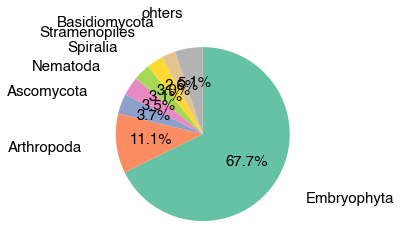

In [7]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set2").colors)

plt.pie(
    dict_count.values(), 
    labels=dict_count.keys(),
    autopct='%1.1f%%',
    counterclock=False,
    startangle=90,
    labeldistance=1.4
    )

plt.savefig("/Users/siomi19/Desktop/comprehensive_PrLD_prediction/phylum.eps")